# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import json
#import requests
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    #{lat}&lon={lon}&appid={API key}
    #query_url = f"{url}appid={api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        #response = requests.get(city_url).json()
        
        #city_name = city_weather['name']
        #country = response['sys']['country']
        #temperature = response['main']['temp']
        #humidity = response['main']['humidity']
        #cloudiness = response['clouds']['all']
        #wind_speed = response['wind']['speed']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | boali
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | balqash
Processing Record 7 of Set 1 | mandalgovi
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | port saint john's
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | zhangzhou
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | aur
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | avarua
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,23.99,94,75,6.69,CC,1724523933
1,adamstown,-25.0660,-130.1015,19.09,69,89,6.51,PN,1724523935
2,boali,4.8005,18.1275,22.40,93,96,0.85,CF,1724523936
3,port-aux-francais,-49.3500,70.2167,1.75,69,86,14.18,TF,1724523937
4,klyuchi,52.2667,79.1667,17.14,72,52,3.45,RU,1724523938


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,23.99,94,75,6.69,CC,1724523933
1,adamstown,-25.0660,-130.1015,19.09,69,89,6.51,PN,1724523935
2,boali,4.8005,18.1275,22.40,93,96,0.85,CF,1724523936
3,port-aux-francais,-49.3500,70.2167,1.75,69,86,14.18,TF,1724523937
4,klyuchi,52.2667,79.1667,17.14,72,52,3.45,RU,1724523938


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

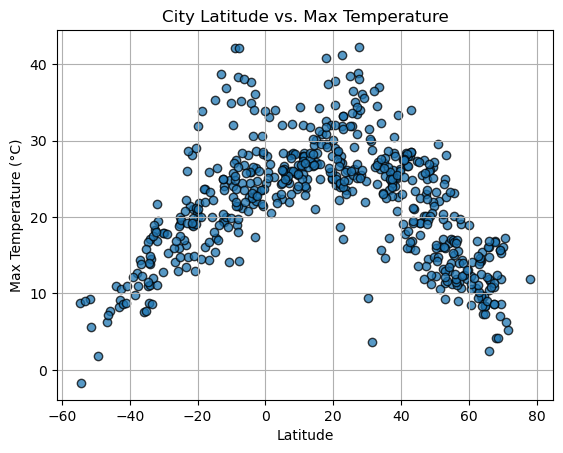

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

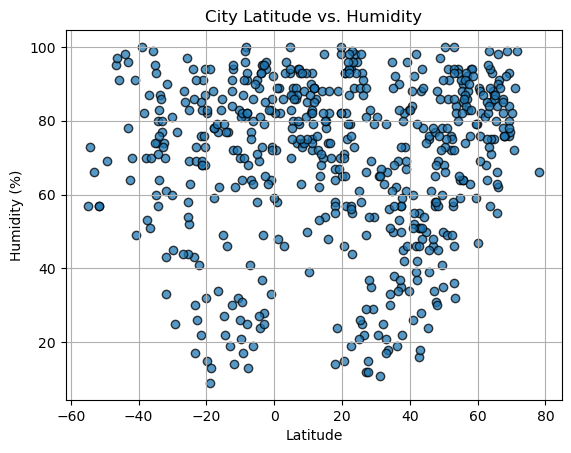

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

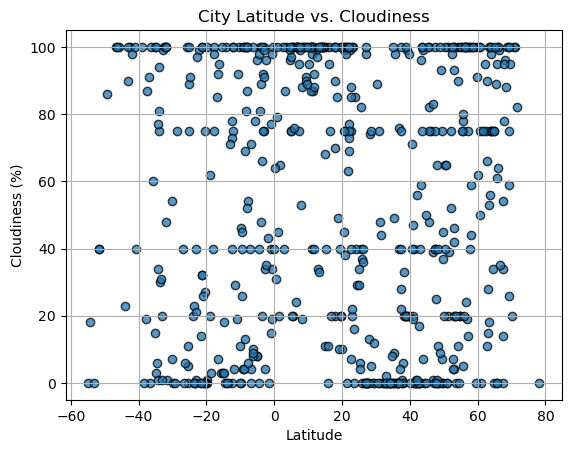

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

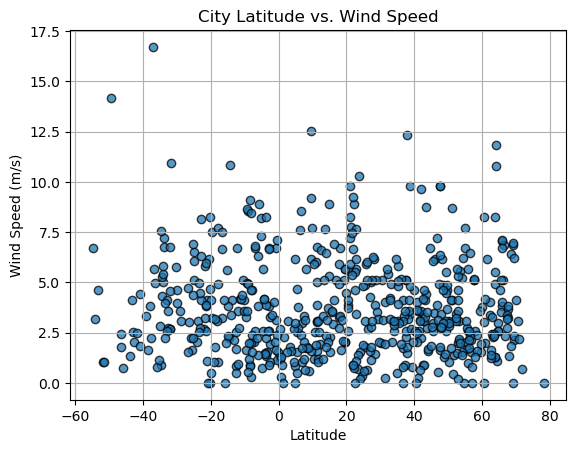

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, x_pos, y_pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regression_values = slope * x_values + intercept



In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,boali,4.8005,18.1275,22.40,93,96,0.85,CF,1724523936
4,klyuchi,52.2667,79.1667,17.14,72,52,3.45,RU,1724523938
5,balqash,46.8481,74.9950,20.15,46,39,7.20,KZ,1724523939
6,mandalgovi,45.7625,106.2708,17.61,45,100,3.47,MN,1724523941
11,ilulissat,69.2167,-51.1000,7.01,93,75,0.00,GL,1724523947


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,23.99,94,75,6.69,CC,1724523933
1,adamstown,-25.0660,-130.1015,19.09,69,89,6.51,PN,1724523935
3,port-aux-francais,-49.3500,70.2167,1.75,69,86,14.18,TF,1724523937
7,margaret river,-33.9500,115.0667,13.89,64,94,6.78,AU,1724523942
8,blackmans bay,-43.0167,147.3167,9.18,96,90,2.51,AU,1724523943


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5101667398930261


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs. Max Temp')

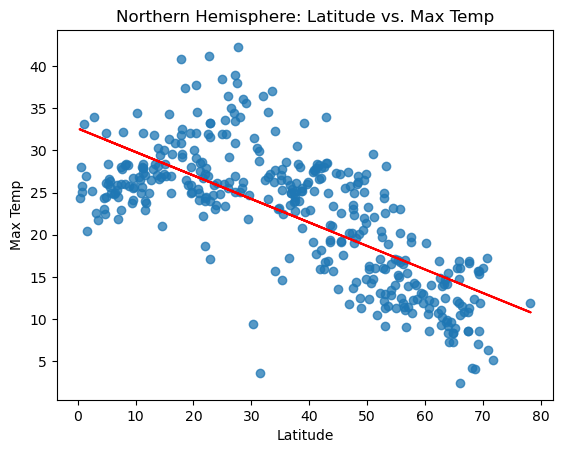

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temp")

The r^2-value is: 0.5745809596056032


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs. Max Temp')

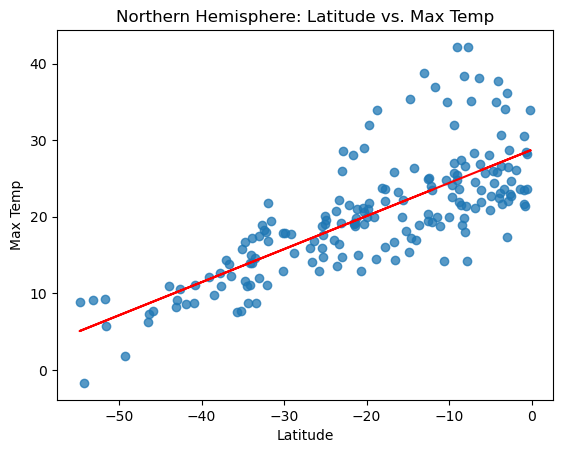

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0009340532998217328


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs. Humidity')

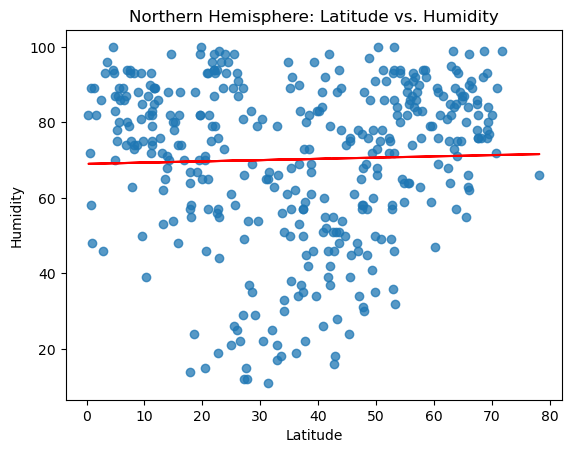

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Latitude vs. Humidity")

The r^2-value is: 0.005949853468523475


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs. Humidity')

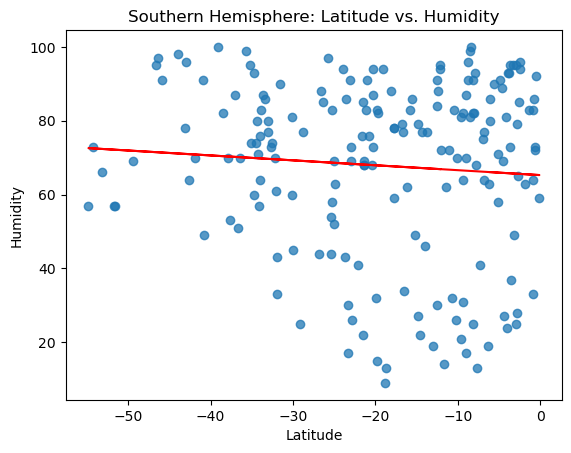

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.017270942485594274


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs. Cloudiness')

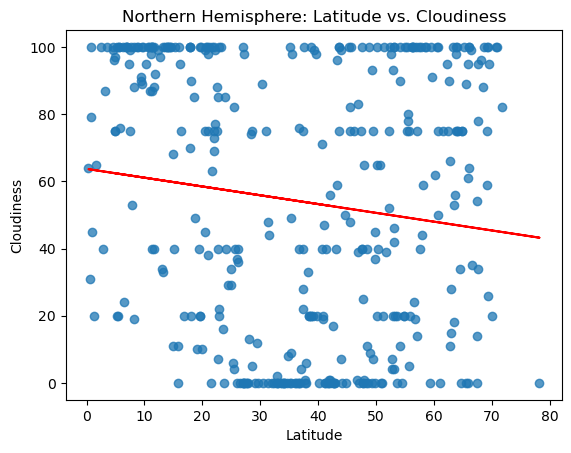

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")

The r^2-value is: 9.15029654284151e-06


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs. Cloudiness')

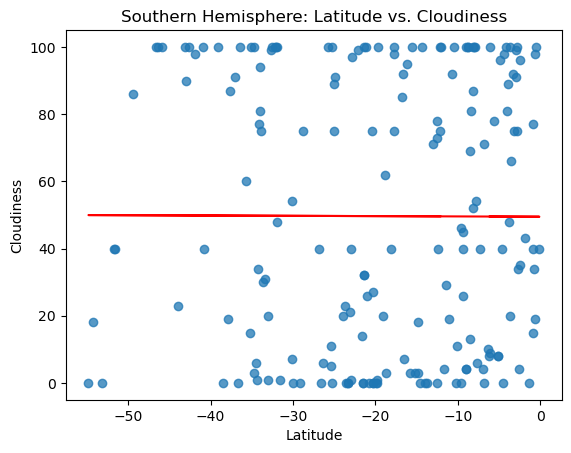

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00018483351538989488


Text(0.5, 1.0, 'Northern Hemisphere: Latitude vs. Wind Speed')

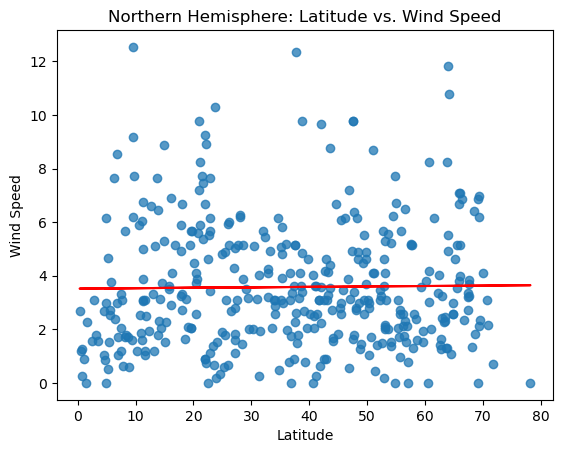

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")

The r^2-value is: 0.004482215711329257


Text(0.5, 1.0, 'Southern Hemisphere: Latitude vs. Wind Speed')

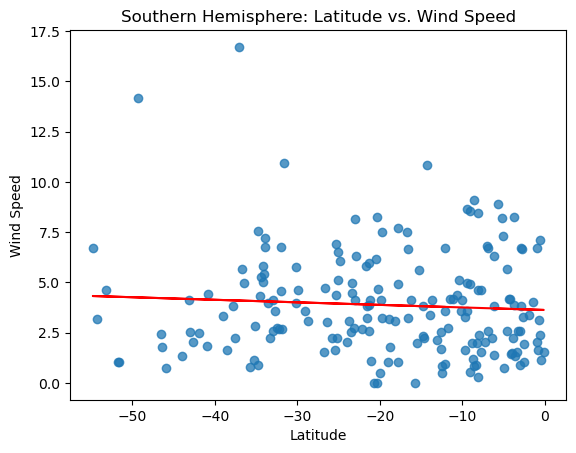

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color="red")

#scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], linewidths=1, alpha=0.75)

print(f"The r^2-value is: {rvalue**2}")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE